# Measuring the distance to shape surfaces

The distance from the center of a shape to its surface is a useful quantity in various situations.
For instance, when the shape represents a vacancy in a crystal, we may wish to know how far the vacancy extends in certain directions.
Another useful example is perturbative theories that treat various geometries relative to their inscribed spheres.
Here we'll see how **coxeter** can be used to compute this quantity for a shape.

In [16]:
import numpy as np
from matplotlib import patches
from matplotlib import pyplot as plt

import coxeter

In [45]:
def plot_distances(shape, vectors, colors):
    """Plot vectors from the center of a shape with suitable labeling."""
    fig, ax = plt.subplots(figsize=(4, 4))

    for v, c in zip(vectors, colors):
        ax.add_patch(
            patches.FancyArrow(
                x=shape.center[0],
                y=shape.center[1],
                dx=v[0],
                dy=v[1],
                width=0.02,
                color=c,
                length_includes_head=True,
                label=f"{np.linalg.norm(v):0.2f}",
            )
        )

    ax.legend(fontsize=18, bbox_to_anchor=(1.05, 0.75))

    # Pad the extent so the shapes edges aren't cut off.
    extent = shape.minimal_bounding_circle.radius + 0.02
    ax.set_xlim([-extent, extent])
    ax.set_ylim([-extent, extent])
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    return fig, ax

Using the handy plotting function defined above, we visualize distance vectors computed using coxeter.
We'll show how this works for both pentagons and ellipses.

In [38]:
# These are the directions in which we'll find distances to the shape surfaces.
random_angles = np.array([0.75 * np.pi, 1.5 * np.pi, 0])
unit_vectors = np.vstack((np.cos(random_angles), np.sin(random_angles))).T
colors = ("r", "b", "g")

# Create a pentagon.
pentagon = coxeter.families.RegularNGonFamily.get_shape(5)

# Create a unit area ellipse.
ellipse = coxeter.shapes.Ellipse(3, 4)
ellipse.area = 1

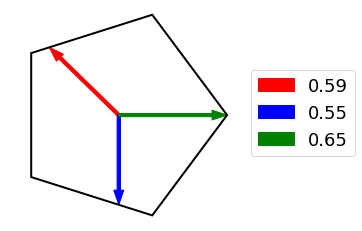

In [46]:
vectors = unit_vectors * pentagon.distance_to_surface(random_angles)[:, np.newaxis]
fig, ax = plot_distances(pentagon, vectors, colors)
ax.add_patch(
    patches.Polygon(pentagon.vertices[:, :2], fill=False, linewidth=2, edgecolor="k")
)

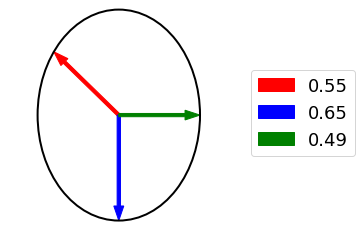

In [47]:
vectors = unit_vectors * ellipse.distance_to_surface(random_angles)[:, np.newaxis]
fig, ax = plot_distances(ellipse, vectors, colors)
ax.add_patch(
    patches.Ellipse(
        (0, 0), 2 * ellipse.a, 2 * ellipse.b, fill=False, linewidth=2, edgecolor="k"
    )
)